# Stock trading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Dataset description

| Feature    | Description                                                   |
|------------|---------------------------------------------------------------|
| Date       | Datetime                                                      |
| Symbol     | Stock name                                                    |
| Adj Close  | Adjusted close stock price                                    |
| Close      | Stock price on closing time                                   |
| High       | Highest stock price on a given day                            |
| Low        | Lowest stock price on a given day                             |
| Open       | Stock price on market opening                                 |
| Volume     | Trading volume                                                |
| Target     | Targeted value. If for a given stock there will be at least 2% increase in the next 2 months. |
| Id         | Id  

In [2]:
data = pd.read_csv('data/train.csv')
print(f'Dataset contains {data.shape[0]} examples, each containing {data.shape[1]} features.')
pd.set_option('display.max_colwidth', None, "display.max_rows", None, 'display.max_columns', None)
display(data.head())

Dataset contains 501400 examples, each containing 10 features.


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
0,2010-01-04,MMM,53.295380,83.019997,83.449997,82.669998,83.089996,3043700.0,0,0
1,2010-01-05,MMM,52.961575,82.500000,83.230003,81.699997,82.800003,2847000.0,0,1
2,2010-01-06,MMM,53.712681,83.669998,84.599998,83.510002,83.879997,5268500.0,0,2
3,2010-01-07,MMM,53.751179,83.730003,83.760002,82.120003,83.320000,4470100.0,0,3
4,2010-01-08,MMM,54.129955,84.320000,84.320000,83.300003,83.690002,3405800.0,0,4


## Descriptive statistics of the dataset

Code block below provides the descriptive statistic, data types for all features and counts the non-null entries.
The descriptive statistics of the dataset:

- **Count:** The number of non-null values in the column.

- **Mean:** The average value of the data in the column.

- **Standard Deviation (std):** A measure of how spread out the data is. It quantifies the amount of variation or dispersion in the data.

- **Minimum (min):** The smallest value in the column.

- **25th Percentile (25%):** The value below which 25% of the data falls. This is also known as the first quartile.

- **50th Percentile (50%):** The median or middle value in the column. This is also known as the second quartile.

- **75th Percentile (75%):** The value below which 75% of the data falls. This is also known as the third quartile.

- **Maximum (max):** The largest value in the column.

In [18]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501400 entries, 0 to 501399
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       501400 non-null  object 
 1   Symbol     501400 non-null  object 
 2   Adj Close  474171 non-null  float64
 3   Close      474171 non-null  float64
 4   High       474171 non-null  float64
 5   Low        474171 non-null  float64
 6   Open       474171 non-null  float64
 7   Volume     474155 non-null  float64
 8   Target     501400 non-null  int64  
 9   Id         501400 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 38.3+ MB


None

,Adj Close,Close,High,Low,Open,Volume,Target,Id
count,474171.000000,474171.000000,474171.000000,474171.000000,474171.000000,4.741550e+05,501400.000000,501400.000000
mean,68.557799,78.063775,78.793316,77.257284,78.038791,7.793082e+06,0.739250,250699.500000
std,145.555119,146.684837,148.337565,144.898091,146.575314,3.203411e+07,0.439044,144741.856823
min,0.700000,0.700000,-60.975002,0.650000,0.700000,0.000000e+00,0.000000,0.000000
25%,24.205503,30.860001,31.170000,30.530001,30.840561,9.811000e+05,0.000000,125349.750000
50%,42.509499,51.540001,52.049999,51.009998,51.529999,2.179300e+06,1.000000,250699.500000
75%,73.034061,84.540001,85.309998,83.720001,84.529999,5.196650e+06,1.000000,376049.250000
max,3892.889893,3892.889893,3946.500000,3815.500000,3900.000000,1.880998e+09,1.000000,501399.000000


## Missing data handling

In [ ]:
missing_values = data.isna().sum()

print("Missing values per column:")
print(missing_values)

The result of the codeblock above suggests a substantial number of null values. By further inspection of the dataset it becomes apparent that most of the rows that contain missing data belongs to ALLE stock in the period between 04.01.2010. to 14.11.2013. As I have no data for that stock in the given period I decide to drop such rows all together, as I believe that reducing the dataset would be less harmful to the ML models than replacing such a large portion of the data with some method of missing value replacement.

In [3]:
threshold = len(data.columns) - 5
cleaned_data = data.dropna(thresh=threshold)
display(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 474171 entries, 0 to 501399
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       474171 non-null  object 
 1   Symbol     474171 non-null  object 
 2   Adj Close  474171 non-null  float64
 3   Close      474171 non-null  float64
 4   High       474171 non-null  float64
 5   Low        474171 non-null  float64
 6   Open       474171 non-null  float64
 7   Volume     474155 non-null  float64
 8   Target     474171 non-null  int64  
 9   Id         474171 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 39.8+ MB


None

In [4]:
data = cleaned_data
missing_values = data.isna().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
Date          0
Symbol        0
Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume       16
Target        0
Id            0
dtype: int64


Now all rows that contained more than six null values are dropped. Now only 16 missing values remain and all of those values are null values in 'Volume' column. By inspecting the data it becomes clear that the missing values belong to the 'MMM' stock and are missing for consecutive timestamps. Multitude of options for replacing such missing values are viable.

## Data visualization
a) Correlation heatmap
The heatmap below suggests perfect positive correlation between all features regarding price.

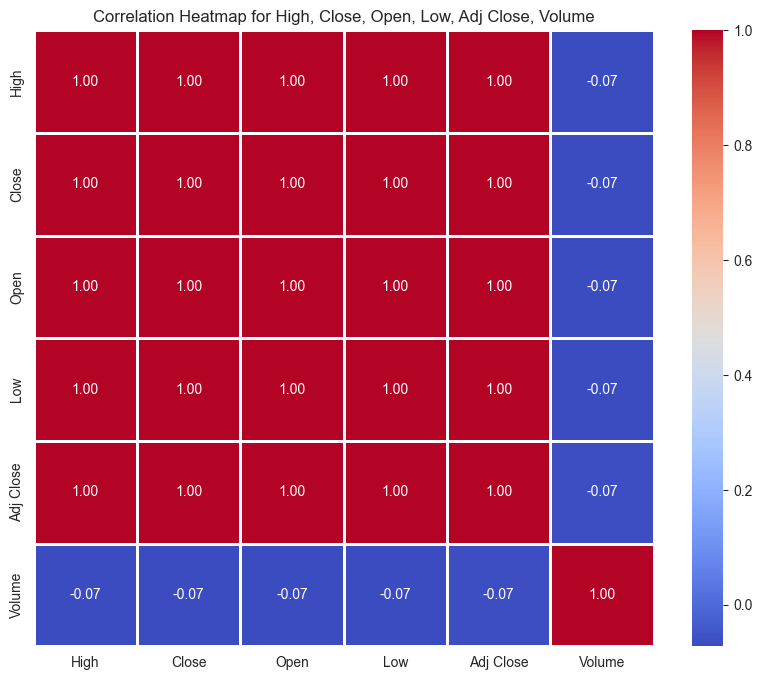

In [21]:
correlation_data = data[['High', 'Close', 'Open', 'Low', 'Adj Close', 'Volume']]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap for High, Close, Open, Low, Adj Close, Volume')
plt.show()



b) Training dataset distribution by target feature for the first four stocks.

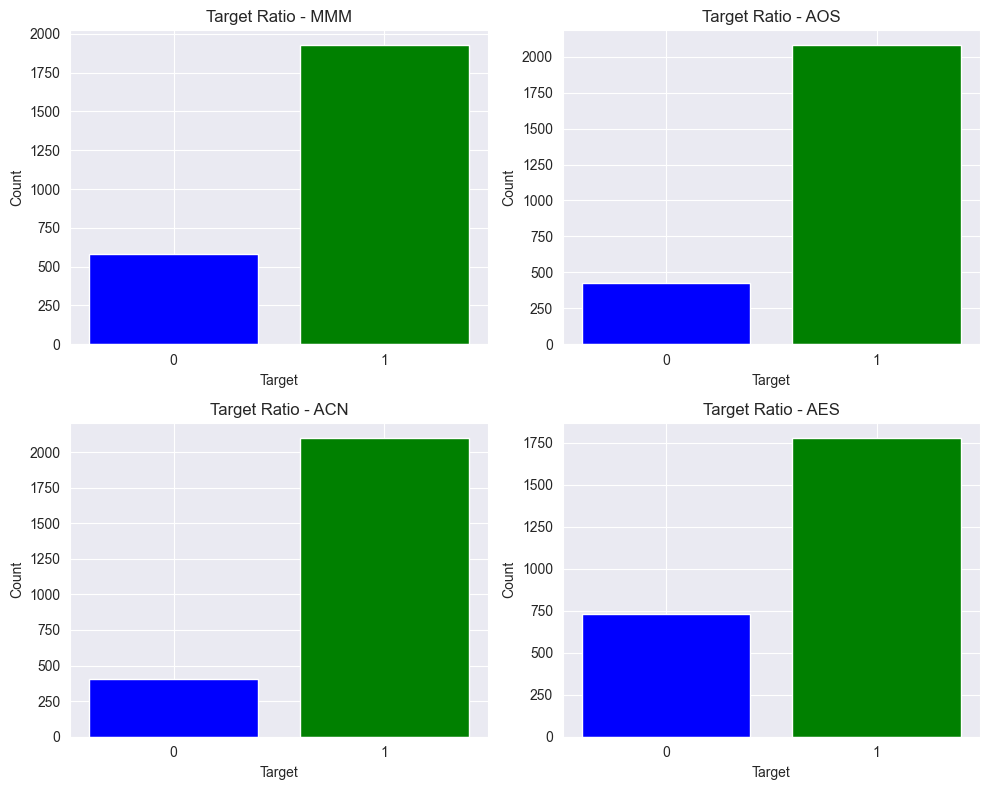

In [22]:
symbol_counts = data['Symbol'].unique()[:4]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, symbol in enumerate(symbol_counts):
    row = i // 2
    col = i % 2

    symbol_data = data[data['Symbol'] == symbol]
    target_counts = symbol_data['Target'].value_counts().sort_index()

    axs[row, col].bar(target_counts.index.astype(str), target_counts.values, color=['b', 'g'])
    axs[row, col].set_title(f'Target Ratio - {symbol}')
    axs[row, col].set_xlabel('Target')
    axs[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()


c) Line chart of High, Low, Open and Close feature movement over time for a selected stock.

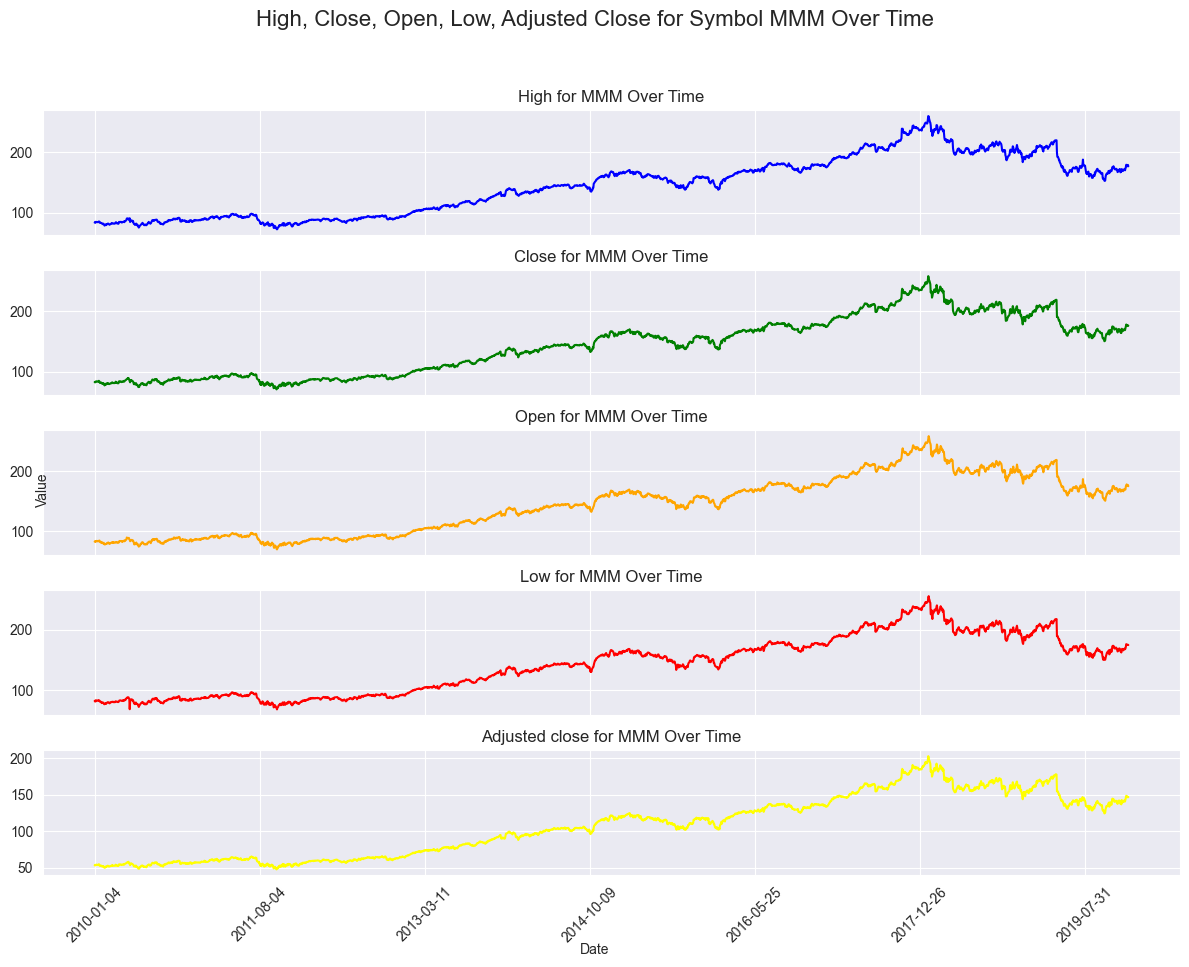

In [23]:
mmm_data = data[data['Symbol'] == 'MMM'].copy()

fig, axs = plt.subplots(nrows=5, figsize=(12, 10), sharex=True)

axs[0].plot(mmm_data['Date'], mmm_data['High'], label='High', color='blue')
axs[1].plot(mmm_data['Date'], mmm_data['Close'], label='Close', color='green')
axs[2].plot(mmm_data['Date'], mmm_data['Open'], label='Open', color='orange')
axs[3].plot(mmm_data['Date'], mmm_data['Low'], label='Low', color='red')
axs[4].plot(mmm_data['Date'], mmm_data['Adj Close'], label='Low', color='yellow')

axs[0].set_title('High for MMM Over Time')
axs[1].set_title('Close for MMM Over Time')
axs[2].set_title('Open for MMM Over Time')
axs[3].set_title('Low for MMM Over Time')
axs[4].set_title('Adjusted close for MMM Over Time')

fig.suptitle('High, Close, Open, Low, Adjusted Close for Symbol MMM Over Time', fontsize=16)
fig.text(0.5, 0.04, 'Date', ha='center', va='center')
fig.text(0.04, 0.5, 'Value', ha='center', va='center', rotation='vertical')

for ax in axs:
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

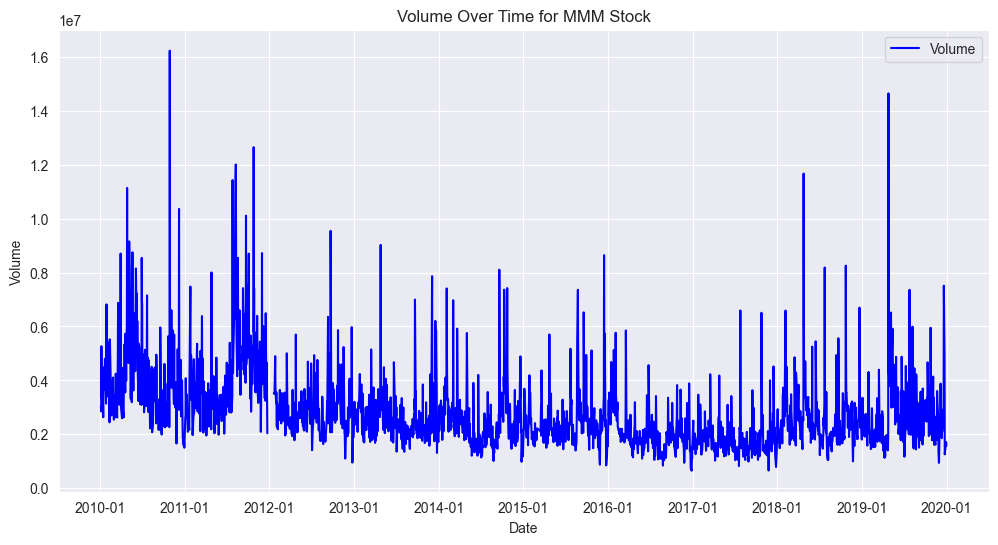

In [24]:
mmm_data.loc[:, 'Date'] = pd.to_datetime(mmm_data['Date'])

plt.figure(figsize=(12, 6))
plt.plot(mmm_data['Date'], mmm_data['Volume'], label='Volume', color='blue')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Volume Over Time for MMM Stock')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

d) Scatter plots

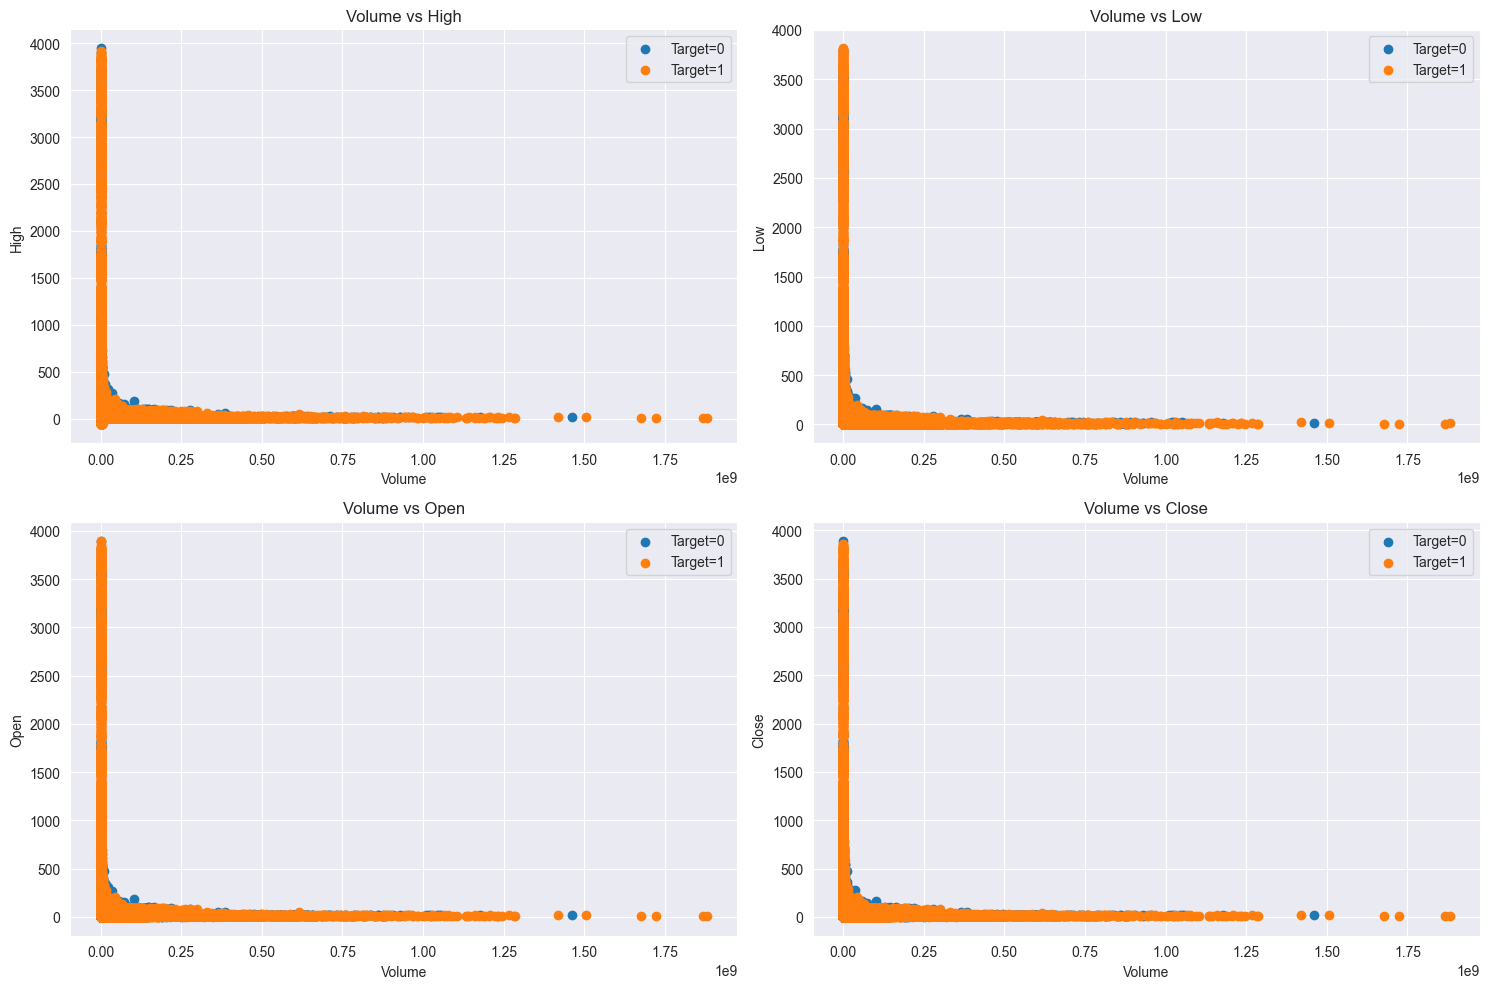

In [25]:
features = ['High', 'Low', 'Open', 'Close']
target_values = data['Target'].unique()

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)

    for target_value in target_values:
        subset_df = data[data['Target'] == target_value]
        plt.scatter(subset_df['Volume'], subset_df[feature], label=f'Target={target_value}')

    plt.title(f'Volume vs {feature}')
    plt.xlabel('Volume')
    plt.ylabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()